# A Guide to Molecular Dynamics with NAMD

#### NAMD:

"[NAMD](http://www.ks.uiuc.edu/Research/namd/), recipient of a 2002 Gordon Bell Award and a 2012 Sidney Fernbach Award, is a parallel molecular dynamics code designed for high-performance simulation of large biomolecular systems. Based on Charm++ parallel objects, NAMD scales to hundreds of cores for typical simulations and beyond 500,000 cores for the largest simulations. NAMD uses the popular molecular graphics program VMD for simulation setup and trajectory analysis, but is also file-compatible with AMBER, CHARMM, and X-PLOR. NAMD is distributed free of charge with source code. You can build NAMD yourself or download binaries for a wide variety of platforms. Our tutorials show you how to use NAMD and VMD for biomolecular modeling"


The following guide has been assembled using information from the official [NAMD tutorial](http://www.ks.uiuc.edu/Training/Tutorials/namd/namd-tutorial-unix-html/index.html) and a [training ppt](http://www.ks.uiuc.edu/Training/SumSchool/materials/lectures/6-2-Intro-Protein-Structure-Dynamics/3-SS03_MDMethod.pdf) produced by the same group$^3$








**[1.1 Requirements for Running a Simulation](#section1.1)**
<a href='#section1.1'></a>

**[1.2 Genertating a Protein Structure File](#section1.2)**
<a href='#section1.2'></a>

**[1.3 Solvating a Protein](#section1.3)**
<a href='#section1.3'></a>

- [Using a Water Sphere](#section1.3A)
    <a href='#section1.3A'></a>


- [Using a Water Box](#section1.3B)
<a href='#section1.3B'></a>


**[1.2 Genertating a Protein Structure File](#section1.2)**
<a href='#section1.2'></a>

<a id='section1.1'></a>

### 1.1 Requirements for Running a Simulation

-  **Protein Data Bank file [.pdb](https://en.wikipedia.org/wiki/Protein_Data_Bank_(file_format)**
    - contains atomic records
        - atom name (N,C)
        - residue name (ALA,HIS)
        - residue id (integer)
        - coordinates (x,y,z)
        - and so on.. 
        - (note: pdb file does not contain hydrogens)
    
    
- **Protein Structure file [.psf](http://www.ks.uiuc.edu/Training/Tutorials/namd/namd-tutorial-unix-html/node23.html#ap-psffiles)**
    - atomic properties (mass, charge, type)
    - stores structural information (bonding, interaction)
    - parameters: bond, angle, dihedrals, impropers
        - e.g. C1 to C2
    - In order to create the psf file, a **topology file [.inp/.rtf](http://www.ks.uiuc.edu/Training/Tutorials/namd/namd-tutorial-win-html/node25.html)** is required.
        - "blueprint" for psf file
        - contains all of the information needed to convert a list of residue names into a complete PSF structure file
        - allows the automatic assignment of hydrogens
       
       
- **Force field parameter file [.prm](http://www.ks.uiuc.edu/Training/Tutorials/namd/namd-tutorial-unix-html/node25.html#ap-paramfiles)**
    - [CHARMM](https://en.wikipedia.org/wiki/CHARMM) forcefield parameter file contains all the numerical constants needed to evaluate forces and energies, given a **psf** and atomic coordinates
    - closely tied to the topology file
    - more on force fields [here](http://www.ks.uiuc.edu/Training/Workshop/SanFrancisco/lectures/Wednesday-ForceFields.pdf)
    
    
- **Configuration file [.config/.conf/.namd](http://www.ks.uiuc.edu/Training/Tutorials/namd/namd-tutorial-unix-html/node26.html#ap-configfiles)**
    - given to NAMD on the command line and specifies everything about the simulation to be done (minus parallelization details)
    - Here we specify the files that contain molecular structure  and initial conditions
        - structure: mypsf.psf
        - coordinates: mypdb.pdb (**always required**)


##### Flowchart of file creation and utilization

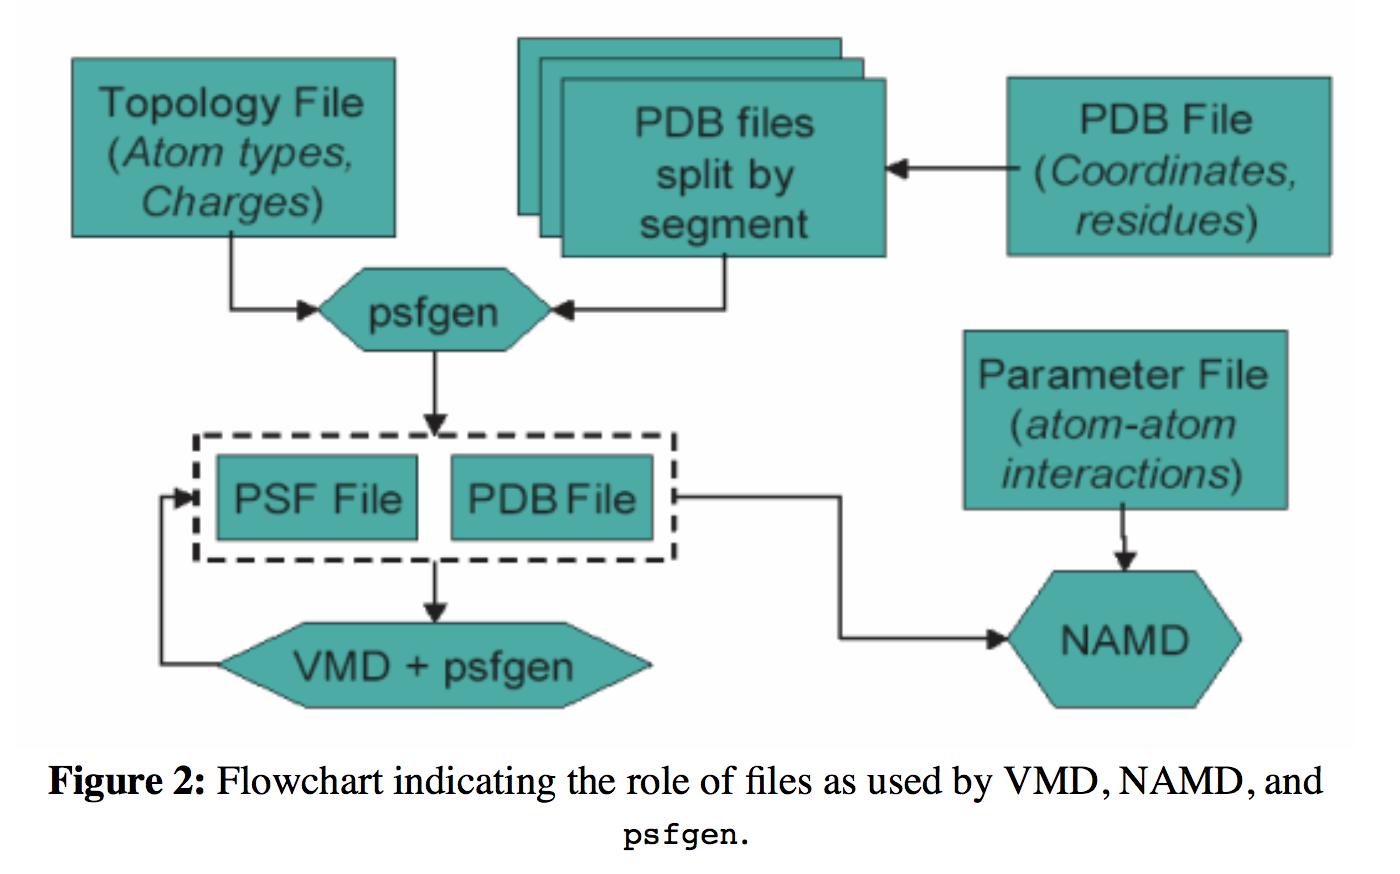

In [4]:
from IPython.display import Image
Image(filename="MDguide_img_1.png", width=450)

<a id='section1.2'></a>

### 1.2 Generating a Protein Structure File (PSF)

**1. Open vmd in desired directory**


        /chosen/dir > vmd
        
        
**2. Load pdb file**


- Click *File $\rightarrow$ New Molecule*...

- In the Molecule File Browser, load the pdb file of interest, in this case we will be loading *1UBQ.pdb*

- Load pdb file by pressing the *Load* button 

**3. Open *extensions>Tk Console* **
- type in:
            set ubq [atomselect top protein]
            $ubq writepdb ubqp.pdb
            
- this will create a ubqp.pdb file, which, which contains the coordinates of the protein without hydrogens

**4. Quit *vmd* **


**5. To create the psf file, there are two options**


- A) Use the automatic psf builder via *Extensions > Modeling > Automatic PSF Builder* 


- B) Manually using the vmd in the command line,

    - To do this, open *nedit* and type in the following
            package require psfgen 
            topology top_all27_prot_lipid.inp
            pdbalias residue HIS HSE
            segment U {pdb, ubqp.pdb}
            coordpdb ubqp.pdb U
            guesscoord
            writepdb ubq.pdb
            writepsf ubq.psf
            
            
   - Save file as *ubq.pgn*
   
   
   - In a terminal window (in the directory containing all relevant files), type in the following command
           > vmd -dispdev text -e ubq.pgn
           
           
**6. Type *exit* in terminal to exit VMD**

- **You should have two new files:**

    - ubq.pdb
    - ubq.psf
            

<a id='section1.3'></a>

### 1.3 Solvating the Protein

Solvation of the biomolecule of interest is essential as it provides a more accurate representation of the object in its nature cellular environment.

There are two ways to solvate, using either of the following:
- a **water sphere** in a surrounding vacuum
    - for minimization and equilibration without periodic boundary conditions
- a **water box**
    - for minimization and equilibration with periodic boundary conditions

<a id='section1.3A'></a>

### - Using a Water Sphere

**1. In the directory containing your chosen [tcl](http://www.ks.uiuc.edu/Training/Tutorials/namd/namd-tutorial-html/node28.html#ap-wsphere) script**, type:

           vmd -dispdev text -e wat_sphere.tcl

- replacing the name of the .tcl file with your own if desired

- the output of the wat_sphere.tcl script will be the center and radius of the water sphere


**2. Type** *exit* **in the terminal window to exit the text version of VMD**


**3. Launch graphical version of VMD with** *vmd* **command in the terminal window**


**4. Load structural information (psf file)**


- Click *File $\rightarrow$ New Molecule...* in the VMD Main Window.

- Load the file using *Browse...* and *Load*

    - Here we will load the *ubq_ws.psf* file
    
**5. Load coordinates into the PSF file (pdb file)**

- In the *Load files for* field in the Molecule File Browser, find .pdb file of interest and load it with the *Load* button


You should be able to see your molecule immersed in a sphere of water - changing representations in VMD will aid in seeing it better


<img src="water_sphere_ubq_2.gif" width=200>

<a id='section1.3B'></a>

### - Using a Water Box

**1. In the VMD Main window, click *Extensions $\rightarrow$ Tk Console* **

- In the TkCon window, type:
        package require solvate
        solvate ubq.psf ubq.pdb -t 5 -o ubq_wb

- 